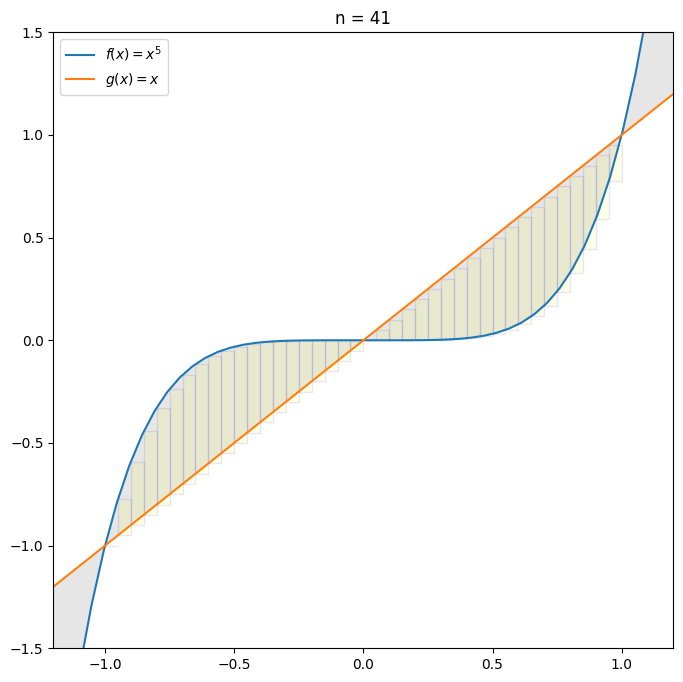

-0.00208229166666629


In [169]:
from matplotlib.pyplot import *
from matplotlib.patches import Polygon, Rectangle
from sympy import symbols, lambdify, solve, latex, integrate
from numpy import linspace, diff

x = symbols('x')
fx = x**5
gx = x
hx = fx - gx
meet_point = [s for s in solve(hx) if s.is_real]
area = 0

if len(meet_point) >= 2:
    xstart = float(meet_point[0])
    xend = float(meet_point[-1])

    ystart = float(fx.subs(x, xstart))
    yend = float(fx.subs(x, xend))

    xx = linspace(xstart - .2, xend + .2, 50)

    fxx = lambdify(x, fx)(xx)
    gxx = lambdify(x, gx)(xx)

    figure(figsize=(8, 8))

    plot(xx, fxx, label=f'$f(x) = {latex(fx)}$')
    plot(xx, gxx, label=f'$g(x) = {latex(gx)}$')

    p = Polygon([*zip(xx, fxx), *zip(xx[::-1], gxx[::-1])], fc='0.9')
    gca().add_patch(p)

    n = 41
    x_slice = linspace(xstart, xend, n)[:-1]
    dn = diff(x_slice)[0]

    for stand_x in x_slice:
        stand_bottom_y = min(fx.subs(x, stand_x), gx.subs(x, stand_x))
        stand_up_y = max(fx.subs(x, stand_x), gx.subs(x, stand_x))
        height = stand_up_y - stand_bottom_y
        r = Rectangle((stand_x, stand_bottom_y), dn, height, fc='yellow', alpha=0.1, ec='b')
        gca().add_patch(r)
        area = area + height*dn

    xlim(xstart - .2, xend + .2)
    ylim(ystart - .5, yend + .5)
    legend(loc='upper left')
    title(f'n = {n}')
    show()

print(area- 2*integrate(hx, (x, -1, 0)))